In [46]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier


In [13]:
dataset = pd.read_csv(r"C:\Users\my\Downloads\data.csv")

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [15]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [16]:
dataset.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)

In [17]:
dataset['diagnosis'] = dataset['diagnosis'].map({'M':1, 'B':0})

In [18]:
dataset.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [19]:
dataset['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

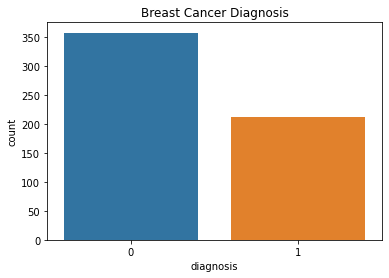

In [20]:
sns.countplot(x='diagnosis', data=dataset)
plt.title('Breast Cancer Diagnosis')
plt.show()

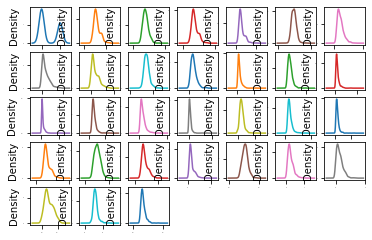

In [25]:
# It is good to check the correlations between the attributes.
#From the output graph below, The red around the diagonal suggests that attributes are correlated with each other. 
#The yellow and green patches suggest some moderate correlation 
# the blue boxes show negative correlations
dataset.plot(kind='density', subplots=True, layout=(5,7), sharex=False, legend=False, fontsize=1)
plt.show()

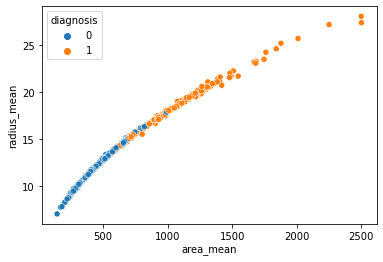

In [26]:
# from below plot  we can say that  the area_mean and radius_mean  values increase their is a higher chance a female being diagnosed with Cancer.
sns.scatterplot(x = 'area_mean', y = 'radius_mean', hue = 'diagnosis', data = dataset)
plt.show()

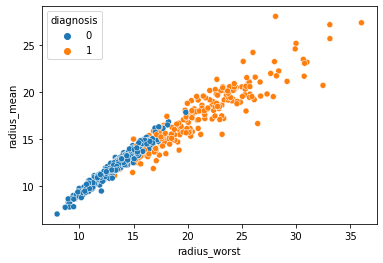

In [28]:
# # from below plot  we can say that  the radius_worst and radius_mean  values increase their is a higher chance a female being diagnosed with Cancer.
sns.scatterplot(x = 'radius_worst', y = 'radius_mean', hue = 'diagnosis', data = dataset)
plt.show()

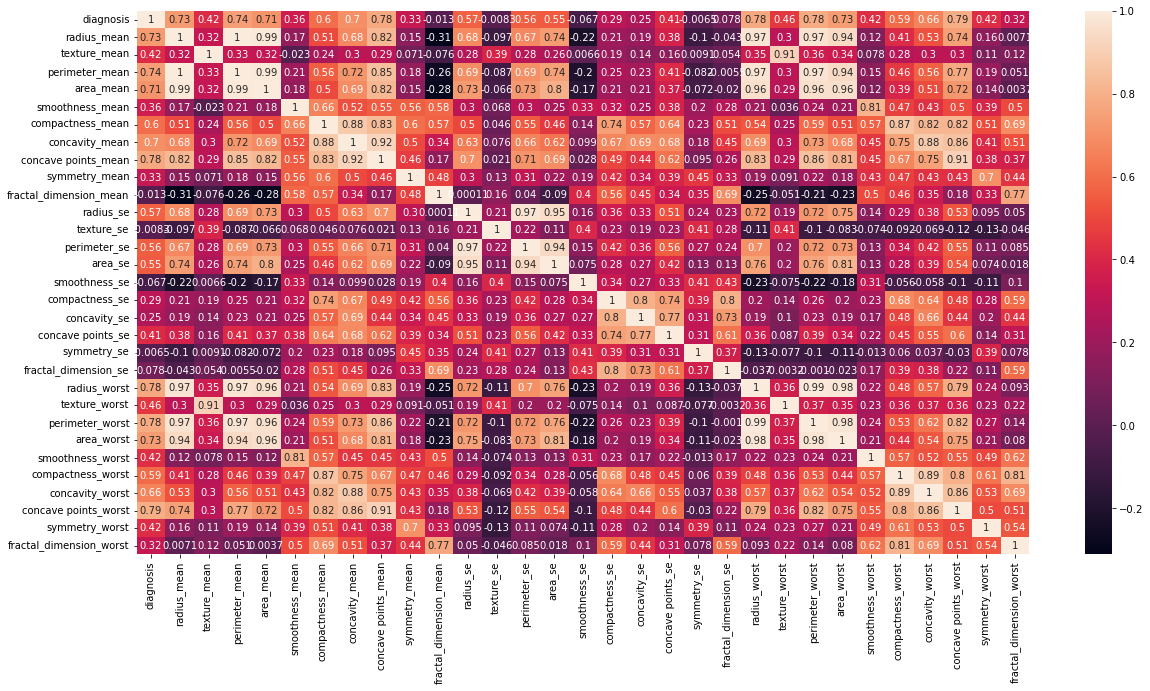

In [29]:
plt.figure(figsize=(20,10)) 
sns.heatmap(dataset.corr(), annot=True)
plt.show()

# From the above correlation plot, we can see there are many features which are highly correlated and might not be useful in our model. 
For example, radius_mean is highly correlated with perimeter_mean, area_mean, radius_worst, perimeter_worst and area_worst. So we can drop them and use only radius_mean.


We create a new_dataset dataframe, so that we can compare it later with the original feature dataset if there is a difference in performance between the model predictions using these datasets. 

In [31]:
new_dataset = dataset.drop(['perimeter_mean', 'area_mean', 
                            'radius_worst', 'perimeter_worst', 'area_worst',
                           'perimeter_se', 'area_se', 'texture_worst',
                           'concave points_worst', 'concavity_mean', 'compactness_worst'], axis=1)

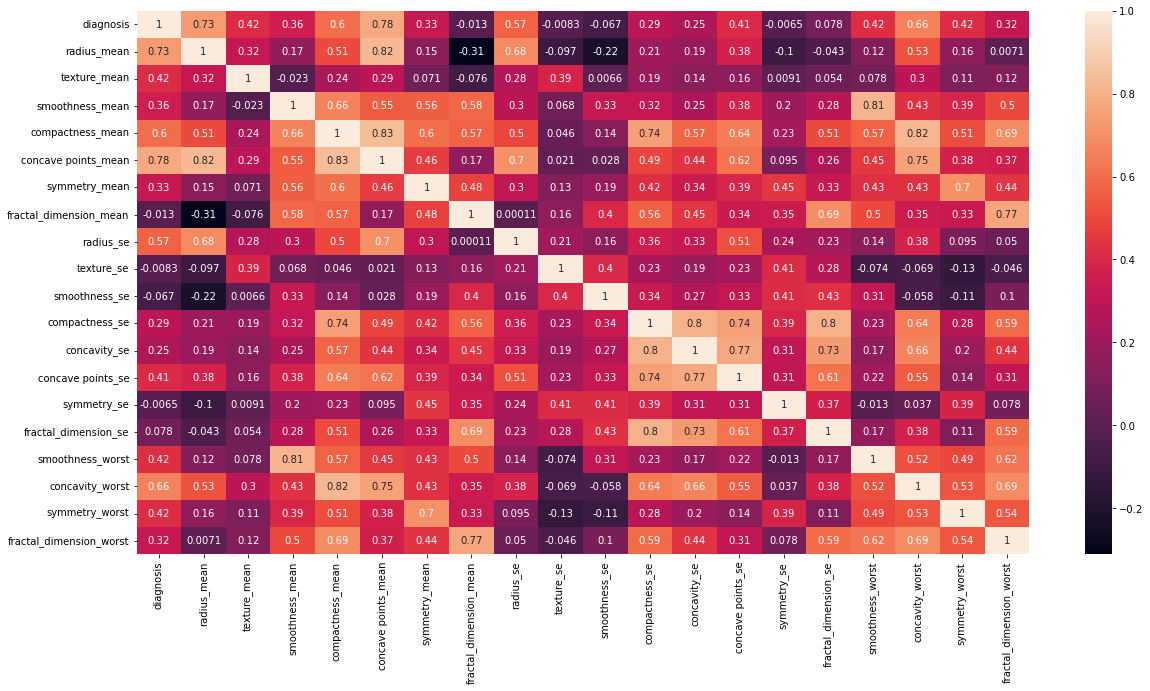

In [32]:
plt.figure(figsize=(20,10)) 
sns.heatmap(new_dataset.corr(), annot=True)
plt.show()

In [33]:
X = new_dataset.drop(['diagnosis'], axis=1)
y = new_dataset['diagnosis']

In [34]:
X.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,0.11840,0.27760,0.14710,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,20.57,17.77,0.08474,0.07864,0.07017,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,19.69,21.25,0.10960,0.15990,0.12790,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,11.42,20.38,0.14250,0.28390,0.10520,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,20.29,14.34,0.10030,0.13280,0.10430,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score,confusion_matrix
from pandas import DataFrame
from sklearn.metrics import accuracy_score

In [38]:
# Split dataset into 70% train, 30% test
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=123)

In [55]:
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

In [43]:
DataFrame(X_train_norm).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,0.327120,0.312235,0.391434,0.244665,0.243940,0.379576,0.270380,0.123102,0.248991,0.155209,0.223468,0.083544,0.231014,0.181519,0.103643,0.337761,0.213977,0.258041,0.238335
std,0.177224,0.154261,0.124859,0.164689,0.190657,0.146339,0.155682,0.110537,0.156783,0.108845,0.174788,0.084026,0.122939,0.116011,0.099168,0.160640,0.163579,0.122867,0.143527
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.198261,0.200952,0.301052,0.124146,0.102957,0.274242,0.160120,0.049302,0.136179,0.089441,0.103474,0.037203,0.149844,0.100193,0.047450,0.221175,0.093031,0.178691,0.132269
50%,0.295200,0.294810,0.383858,0.208592,0.166277,0.365152,0.240944,0.088914,0.224079,0.128658,0.171084,0.066275,0.212446,0.157567,0.080901,0.330012,0.179553,0.243249,0.208121
75%,0.422551,0.398356,0.468945,0.323612,0.367048,0.454545,0.341933,0.165561,0.322289,0.194375,0.289400,0.105947,0.288028,0.226480,0.126997,0.427839,0.302875,0.309038,0.309300
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
# fit scaler on training data
stdscale = StandardScaler().fit(X_train)

# transform training data
X_train_std = stdscale.transform(X_train)

# transform testing dataabs
X_test_std = stdscale.transform(X_test)

In [45]:
DataFrame(X_train_std).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02
mean,-5.216375e-16,-5.467430e-17,1.824336e-16,-3.053113e-16,1.350120e-16,8.535886e-17,7.090922e-16,1.291541e-16,3.118667e-16,-3.514776e-17,-2.677925e-17,-1.051643e-16,2.977797e-16,-8.731151e-17,-1.969391e-16,5.467430e-16,-8.262819e-17,-5.495325e-17,4.850949e-16
std,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00
min,-1.848126e+00,-2.026620e+00,-3.138956e+00,-1.487486e+00,-1.281082e+00,-2.597079e+00,-1.738928e+00,-1.115072e+00,-1.590123e+00,-1.427763e+00,-1.280122e+00,-9.955137e-01,-1.881450e+00,-1.566633e+00,-1.046440e+00,-2.105247e+00,-1.309746e+00,-2.102806e+00,-1.662654e+00
25%,-7.280122e-01,-7.223062e-01,-7.247834e-01,-7.327193e-01,-7.403884e-01,-7.206975e-01,-7.091281e-01,-6.684890e-01,-7.204489e-01,-6.050010e-01,-6.873773e-01,-5.521990e-01,-6.610737e-01,-7.018984e-01,-5.673562e-01,-7.266713e-01,-7.403063e-01,-6.466321e-01,-7.399274e-01
50%,-1.803404e-01,-1.131025e-01,-6.074581e-02,-2.193102e-01,-4.078544e-01,-9.869251e-02,-1.893177e-01,-3.096794e-01,-1.590892e-01,-2.442395e-01,-3.000820e-01,-2.057771e-01,-1.512237e-01,-2.067150e-01,-2.296137e-01,-4.829589e-02,-2.107111e-01,-1.205463e-01,-2.107750e-01
75%,5.391499e-01,5.589866e-01,6.215714e-01,4.799786e-01,6.465186e-01,5.129458e-01,4.601912e-01,3.846020e-01,4.681056e-01,3.602885e-01,3.776846e-01,2.669514e-01,4.643451e-01,3.880515e-01,2.357959e-01,5.614545e-01,5.441423e-01,4.155794e-01,4.950571e-01
max,3.801555e+00,4.464066e+00,4.880172e+00,4.592208e+00,3.970554e+00,4.244976e+00,4.692497e+00,7.943036e+00,4.796156e+00,7.771210e+00,4.448302e+00,1.092050e+01,6.262880e+00,7.064071e+00,9.050151e+00,4.127707e+00,4.811215e+00,6.046304e+00,5.313463e+00


In [48]:
lr = LogisticRegression(max_iter = 500, n_jobs=-1, random_state=123)
dt = DecisionTreeClassifier(random_state=123)
rf = RandomForestClassifier(random_state=123)
knn = KNN()

In [50]:
classifiers = [('Logistic Regression', lr),
('K Nearest Neighbours', knn),
('Random Forest Classifier', rf),
('Decision Tree', dt)] 

### Models prediction without any normalization or standardization

In [53]:
# Iterate over the defined list of tuples containing the classifiers
for clf_name, clf in classifiers:
    #fit clf to the training set
    clf.fit(X_train, y_train)
    # Predict the labels of the test set
    y_pred = clf.predict(X_test)
    # Evaluate the accuracy of clf on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy_score(y_test, y_pred)))

Logistic Regression : 0.942
K Nearest Neighbours : 0.901
Random Forest Classifier : 0.965
Decision Tree : 0.901


### Models prediction with Normalized data

In [56]:
for clf_name, clf in classifiers:
    #fit clf to the training set
    clf.fit(X_train_norm, y_train)
    # Predict the labels of the test set
    y_pred = clf.predict(X_test_norm)
    # Evaluate the accuracy of clf on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy_score(y_test, y_pred)))

Logistic Regression : 0.971
K Nearest Neighbours : 0.971
Random Forest Classifier : 0.965
Decision Tree : 0.901


### Models prediction with Standardized data


In [57]:
# Iterate over the defined list of tuples containing the classifiers
for clf_name, clf in classifiers:
    #fit clf to the training set
    clf.fit(X_train_std, y_train)
    # Predict the labels of the test set
    y_pred = clf.predict(X_test_std)
    # Evaluate the accuracy of clf on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy_score(y_test, y_pred)))

Logistic Regression : 0.994
K Nearest Neighbours : 0.977
Random Forest Classifier : 0.965
Decision Tree : 0.901


From the above accuracy scores, we can observe the following:
1. DecisionTree and RandomForestClassifier are insensitive to feature scaling.
2. LinearRegression, KNN  are sensitive to feature scaling.
3. LogisticRegression models gives us the highest accuracy.

 

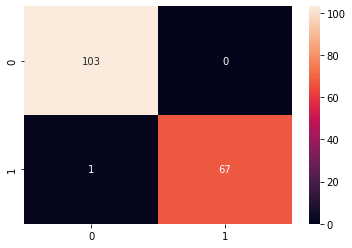

In [58]:
cm = confusion_matrix(y_test, lr.predict(X_test_std))
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

From the above confusion matrix, we can observe that  lr models predict only 1 value incorrect. 